In [53]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import matplotlib.animation as animation

In [85]:
if not os.path.exists("plots"):
    os.mkdir("plots")

In [127]:
log_file = "2023-09-10_18-14-33"

agp_df = pd.read_csv(f"logs/{log_file}/agp_data.csv", index_col=0)
cars_df = pd.read_csv(f"logs/{log_file}/cars_data.csv", index_col=0)
exits_df = pd.read_csv(f"logs/{log_file}/exits_data.csv", index_col=0)

In [90]:
agp_df.head()

,frame,current_car_count,historic_car_count,current_crash_count,historic_crash_count,avg_v,avg_a,avg_t_d
0,0.0,2.0,2.0,0.0,0.0,18.232688,2.562109,0.0
1,1.0,2.0,2.0,0.0,0.0,20.278067,2.540484,0.0
2,2.0,2.0,2.0,0.0,0.0,21.701010,2.538188,0.0
3,3.0,2.0,2.0,0.0,0.0,23.035056,2.537205,0.0
4,4.0,3.0,3.0,0.0,0.0,24.339453,2.536658,0.0


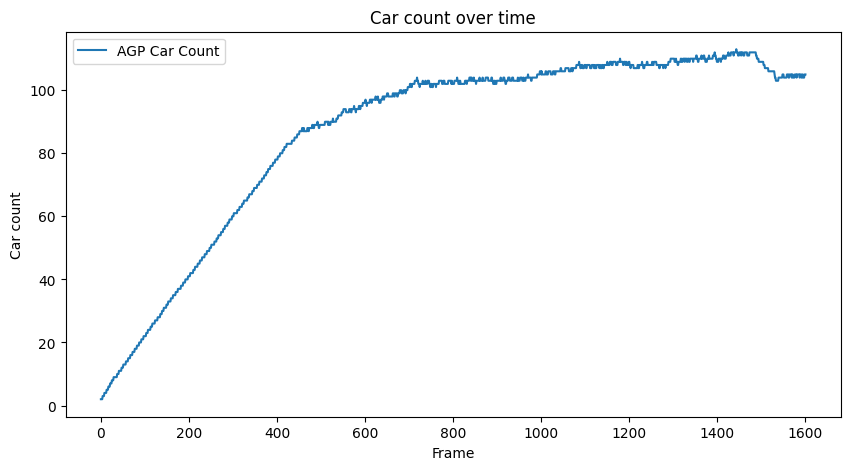

In [128]:
fig, ax = plt.subplots(figsize=(10, 5))

agp_df.groupby('frame')['current_car_count'].mean().plot(ax=ax, label='AGP Car Count')

ax.set_xlabel('Frame')
ax.set_ylabel('Car count')
ax.set_title('Car count over time')

plt.legend()

In [129]:
cars_df.sample(10)

,frame,car_id,car_x,car_v,car_a,car_t_d,f_car_id,b_car_id
80169,1051.0,875560.0,9516.445187,23.200338,-3.460897,461.0,528532.0,514144.0
44875,710.0,510371.0,2945.505790,22.776074,-3.096858,188.0,558708.0,264046.0
17692,417.0,966755.0,6560.622492,26.158766,2.846295,278.0,168523.0,940222.0
98820,1224.0,482027.0,10025.723930,24.796954,1.783641,517.0,284910.0,763680.0
10418,316.0,926408.0,4529.652626,25.088216,2.326684,199.0,870214.0,327200.0
130998,1518.0,98986.0,442.420905,5.738256,-3.347330,80.0,878829.0,312697.0
6676,250.0,76255.0,3164.864355,25.324609,2.075951,143.0,939956.0,870214.0
78342,1034.0,284910.0,5969.492880,25.539140,-3.515292,332.0,576588.0,482027.0
62872,885.0,859628.0,8653.530952,23.928136,-3.052567,424.0,616222.0,169392.0
42869,690.0,440389.0,4949.784388,24.132769,2.803929,261.0,451723.0,74435.0


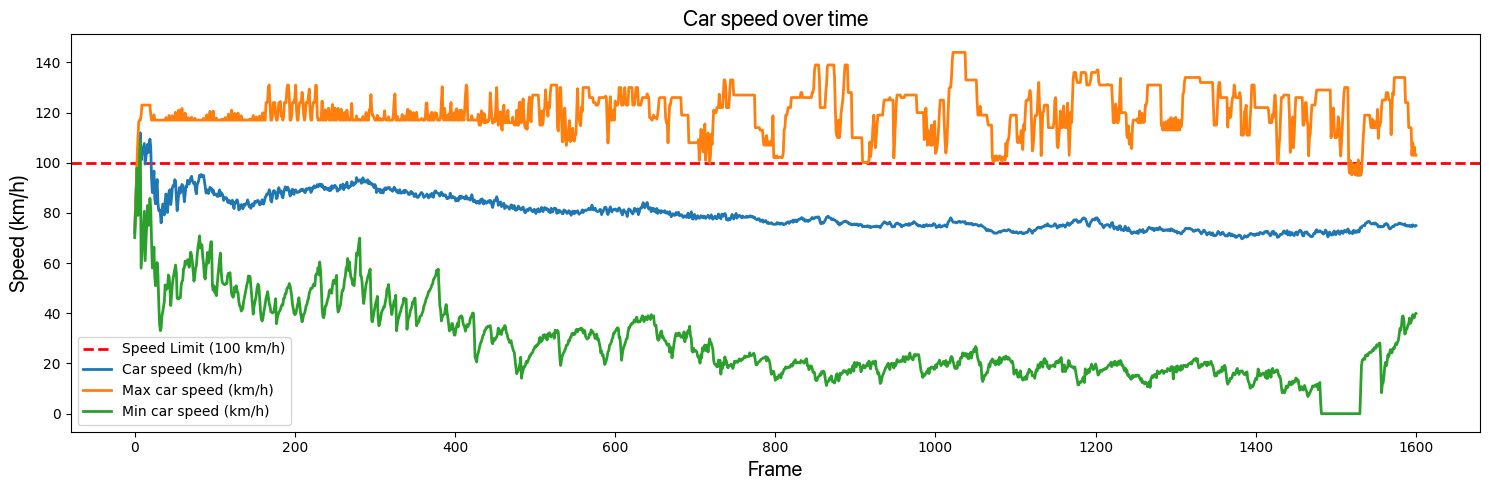

In [130]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot line at y=100
ax.axhline(100, color='r', linestyle='--', label='Speed Limit (100 km/h)', linewidth=2)

cars_df.groupby('frame')['car_v'].mean().apply(lambda x: x*3.6).plot(ax=ax, label='Car speed (km/h)', linewidth=2)

# Plot max car_v for each frame
cars_df.groupby('frame')['car_v'].max().apply(lambda x: x*3.6).plot(ax=ax, label='Max car speed (km/h)', linewidth=2)

# Plot min car_v for each frame
cars_df.groupby('frame')['car_v'].min().apply(lambda x: x*3.6).plot(ax=ax, label='Min car speed (km/h)', linewidth=2)

ax.set_xlabel('Frame', font="SF Pro Display", fontsize=15)
ax.set_ylabel('Speed (km/h)', font="SF Pro Display", fontsize=15)

ax.legend()

ax.set_title('Car speed over time', font="SF Pro Display", fontsize=16)

fig.tight_layout()

# Transparent background

fig.patch.set_alpha(0)

fig.savefig('plots/car_speed_over_time.png', dpi=300, transparent=True)

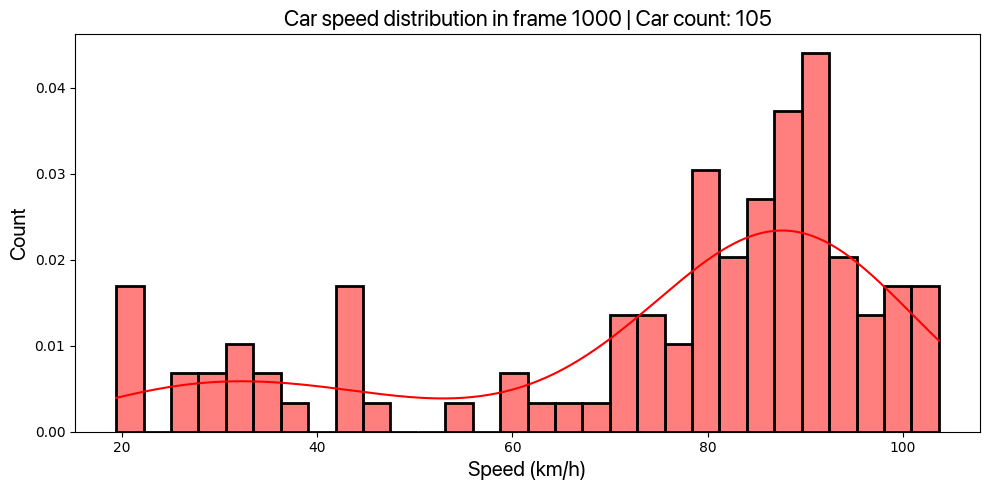

In [131]:
# Plot speed distribution in a given frame

frame = 1000

fig, ax = plt.subplots(figsize=(10, 5))

car_count = int(agp_df[agp_df['frame'] == frame]['current_car_count'].values[0])

sns.histplot(cars_df[cars_df['frame'] == frame]['car_v'].apply(lambda x: x*3.6), ax=ax, bins=30, kde=True, stat='density', color='red', linewidth=2)

ax.set_xlabel('Speed (km/h)', font="SF Pro Display", fontsize=15)
ax.set_ylabel('Count', font="SF Pro Display", fontsize=15)

ax.set_title(f'Car speed distribution in frame {frame} | Car count: {car_count}', font="SF Pro Display", fontsize=16)

fig.tight_layout()

# Transparent background

fig.patch.set_alpha(0)

fig.savefig('plots/car_speed_distribution.png', dpi=300, transparent=True)

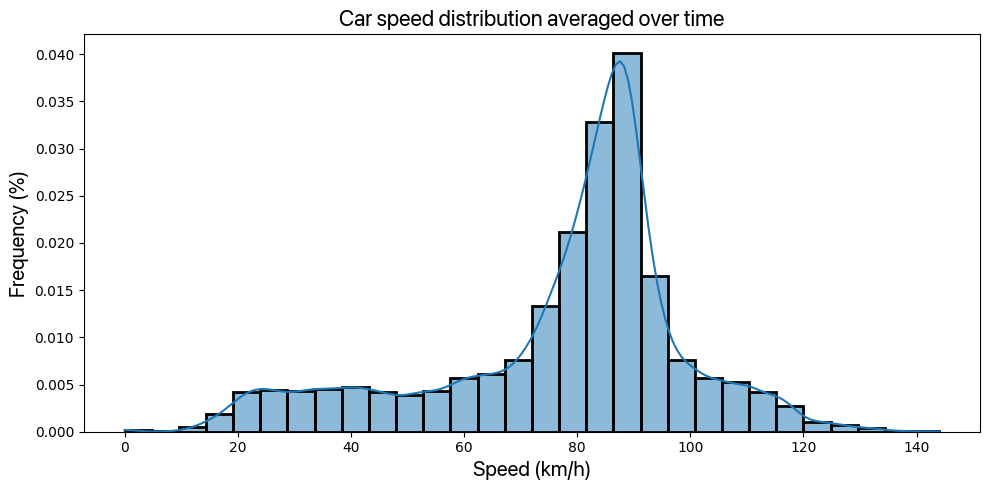

In [132]:
# Plot speed distributions averaged over time

fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(cars_df['car_v'].apply(lambda x: x*3.6), ax=ax, bins=30, kde=True, stat='density', linewidth=2)


ax.set_xlabel('Speed (km/h)', font="SF Pro Display", fontsize=15)
ax.set_ylabel('Frequency (%)', font="SF Pro Display", fontsize=15)

ax.set_title(f'Car speed distribution averaged over time', font="SF Pro Display", fontsize=16)

fig.tight_layout()

# Transparent background

fig.patch.set_alpha(0)

fig.savefig('plots/car_speed_distribution_averaged.png', dpi=300, transparent=True)

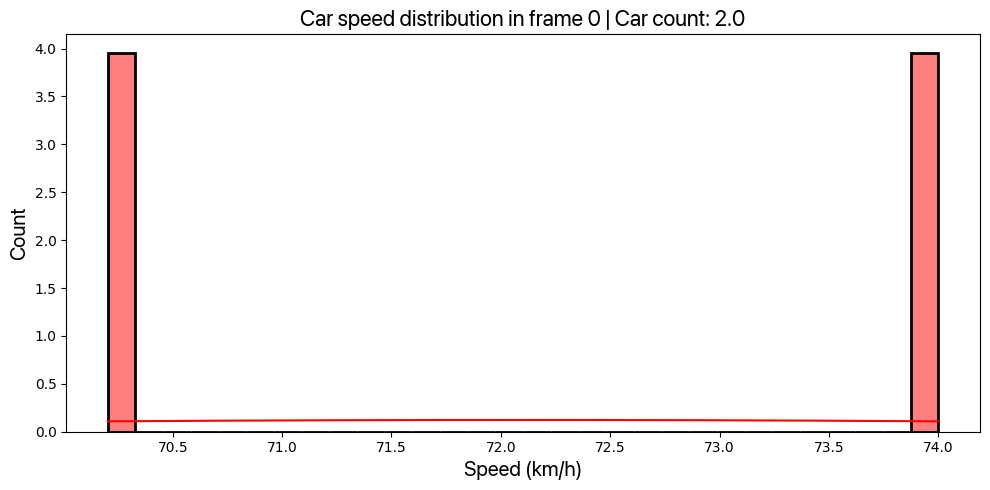

In [84]:
""" # Animate car speed distribution over time

fig, ax = plt.subplots(figsize=(10, 5))

def animate(i):
    ax.clear()

    car_count = int(agp_df[agp_df['frame'] == i]['current_car_count'].values[0])

    sns.histplot(cars_df[cars_df['frame'] == i]['car_v'].apply(lambda x: x*3.6), ax=ax, bins=30, kde=True, stat='density', color='red', linewidth=2)
    ax.set_xlabel('Speed (km/h)', font="SF Pro Display", fontsize=15)
    ax.set_ylabel('Count', font="SF Pro Display", fontsize=15)
    ax.set_title(f'Car speed distribution in frame {i} | Car count: {car_count}', font="SF Pro Display", fontsize=16)
    fig.tight_layout()
    fig.patch.set_alpha(0)

ani = animation.FuncAnimation(fig, animate, frames=range(0, len(cars_df['frame'].unique()), 1), interval=1000)

ani.save('plots/car_speed_distribution.gif', writer='imagemagick', fps=10) """

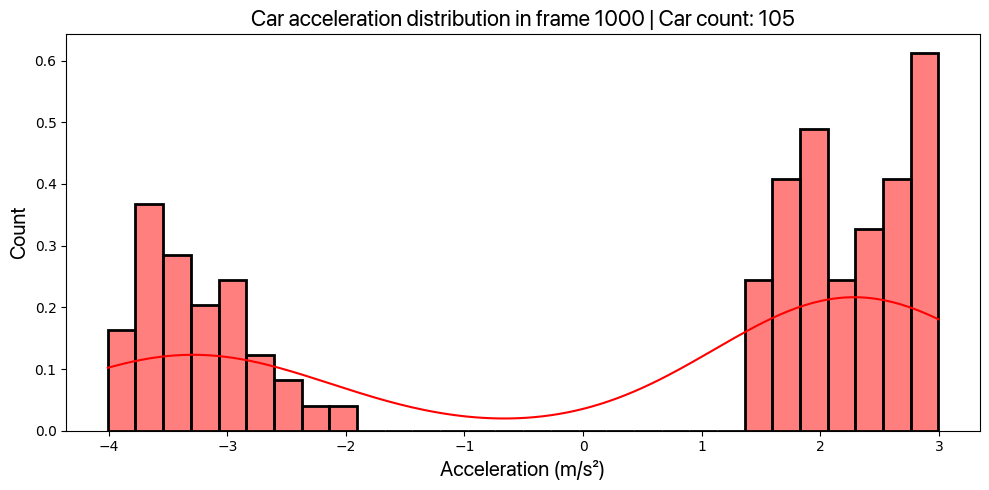

In [133]:
# Plot acceleration distribution in a given frame

frame = 1000

fig, ax = plt.subplots(figsize=(10, 5))

car_count = int(agp_df[agp_df['frame'] == frame]['current_car_count'].values[0])

sns.histplot(cars_df[cars_df['frame'] == frame]['car_a'], ax=ax, bins=30, kde=True, stat='density', color='red', linewidth=2)

ax.set_xlabel('Acceleration (m/s²)', font="SF Pro Display", fontsize=15)
ax.set_ylabel('Count', font="SF Pro Display", fontsize=15)

ax.set_title(f'Car acceleration distribution in frame {frame} | Car count: {car_count}', font="SF Pro Display", fontsize=16)

fig.tight_layout()

# Transparent background

fig.patch.set_alpha(0)

fig.savefig('plots/car_acceleration_distribution.png', dpi=300, transparent=True)

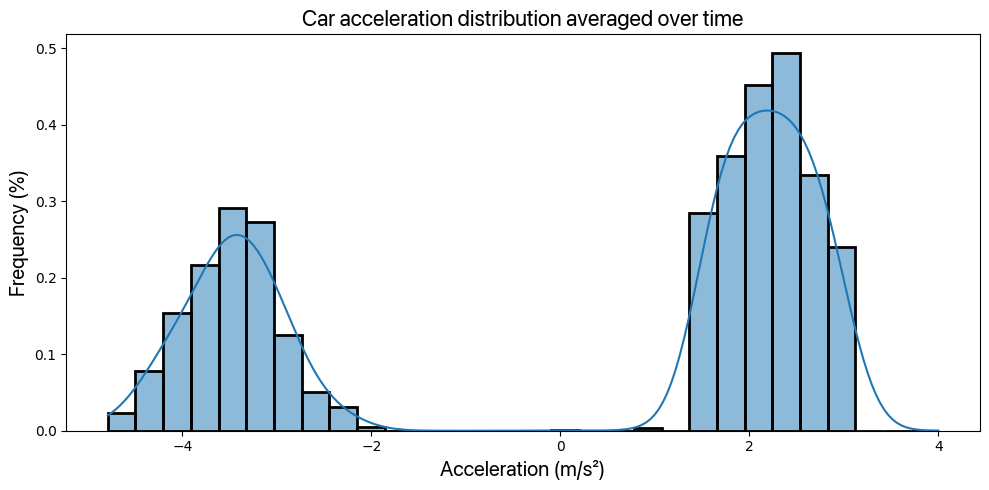

In [109]:
# Plot acceleration distributions averaged over time

fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(cars_df['car_a'], ax=ax, bins=30, kde=True, stat='density', linewidth=2)

ax.set_xlabel('Acceleration (m/s²)', font="SF Pro Display", fontsize=15)
ax.set_ylabel('Frequency (%)', font="SF Pro Display", fontsize=15)

ax.set_title(f'Car acceleration distribution averaged over time', font="SF Pro Display", fontsize=16)

fig.tight_layout()

# Transparent background

fig.patch.set_alpha(0)

fig.savefig('plots/car_acceleration_distribution_averaged.png', dpi=300, transparent=True)

In [111]:
cars_df.head()

,frame,car_id,car_x,car_v,car_a,car_t_d,f_car_id,b_car_id
0,0.0,555889.0,0.000000,20.555556,2.000000,0.0,421909.0,-1.0
1,0.0,421909.0,118.207123,19.500932,2.562109,1.0,-1.0,555889.0
2,1.0,555889.0,21.781792,23.047716,2.507382,1.0,421909.0,-1.0
3,1.0,421909.0,138.976300,22.063041,2.562109,2.0,-1.0,555889.0
4,2.0,555889.0,46.070662,25.555097,2.507382,2.0,421909.0,-1.0


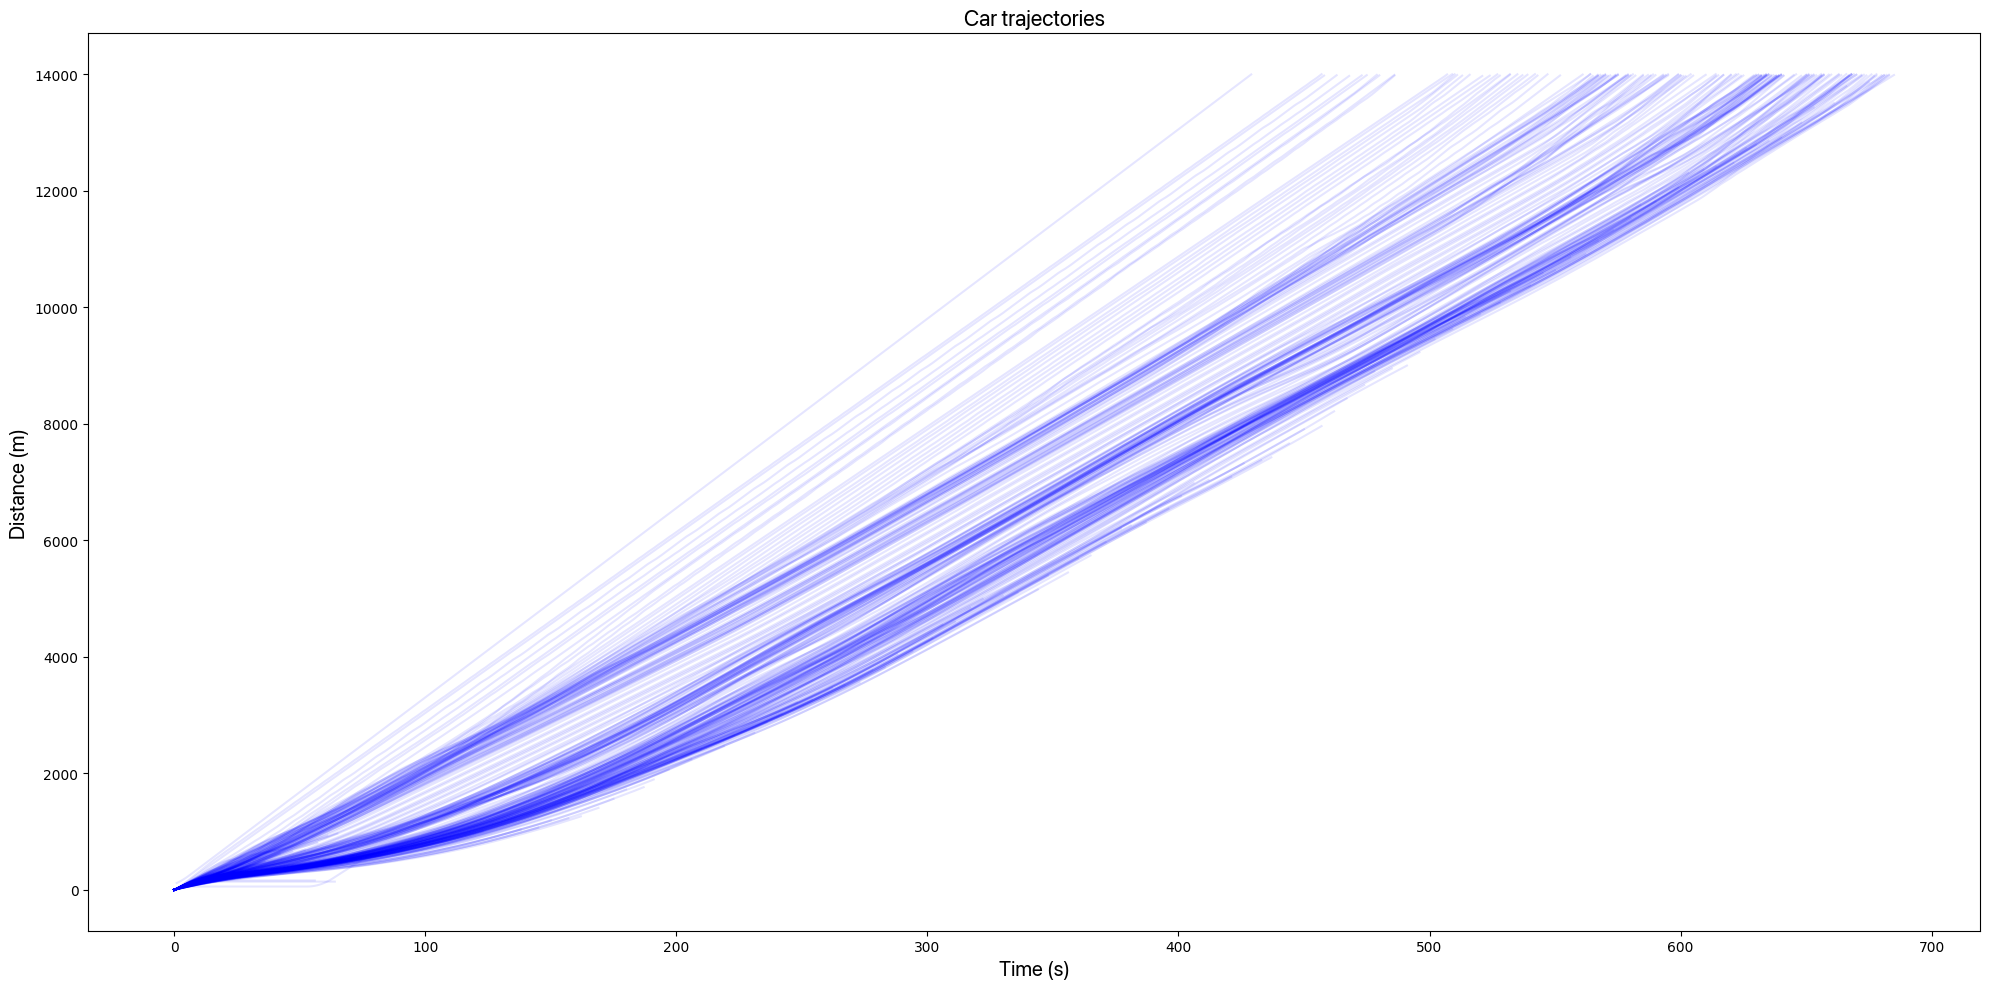

In [135]:
# Plot all car trajectories

fig, ax = plt.subplots(figsize=(20, 10))

#sns.scatterplot(data=cars_df, x='car_t_d', y='car_x', hue='car_id', ax=ax, s=10, color='blue')

cars_df.groupby('car_id').plot(x='car_t_d', y='car_x', ax=ax, legend=False, alpha=0.1, color='blue')

ax.set_xlabel('Time (s)', font="SF Pro Display", fontsize=15)
ax.set_ylabel('Distance (m)', font="SF Pro Display", fontsize=15)

ax.set_title(f'Car trajectories', font="SF Pro Display", fontsize=16)

fig.tight_layout()

# Transparent background
fig.patch.set_alpha(0)

fig.savefig('plots/car_trajectories_relative.png', dpi=300, transparent=True)

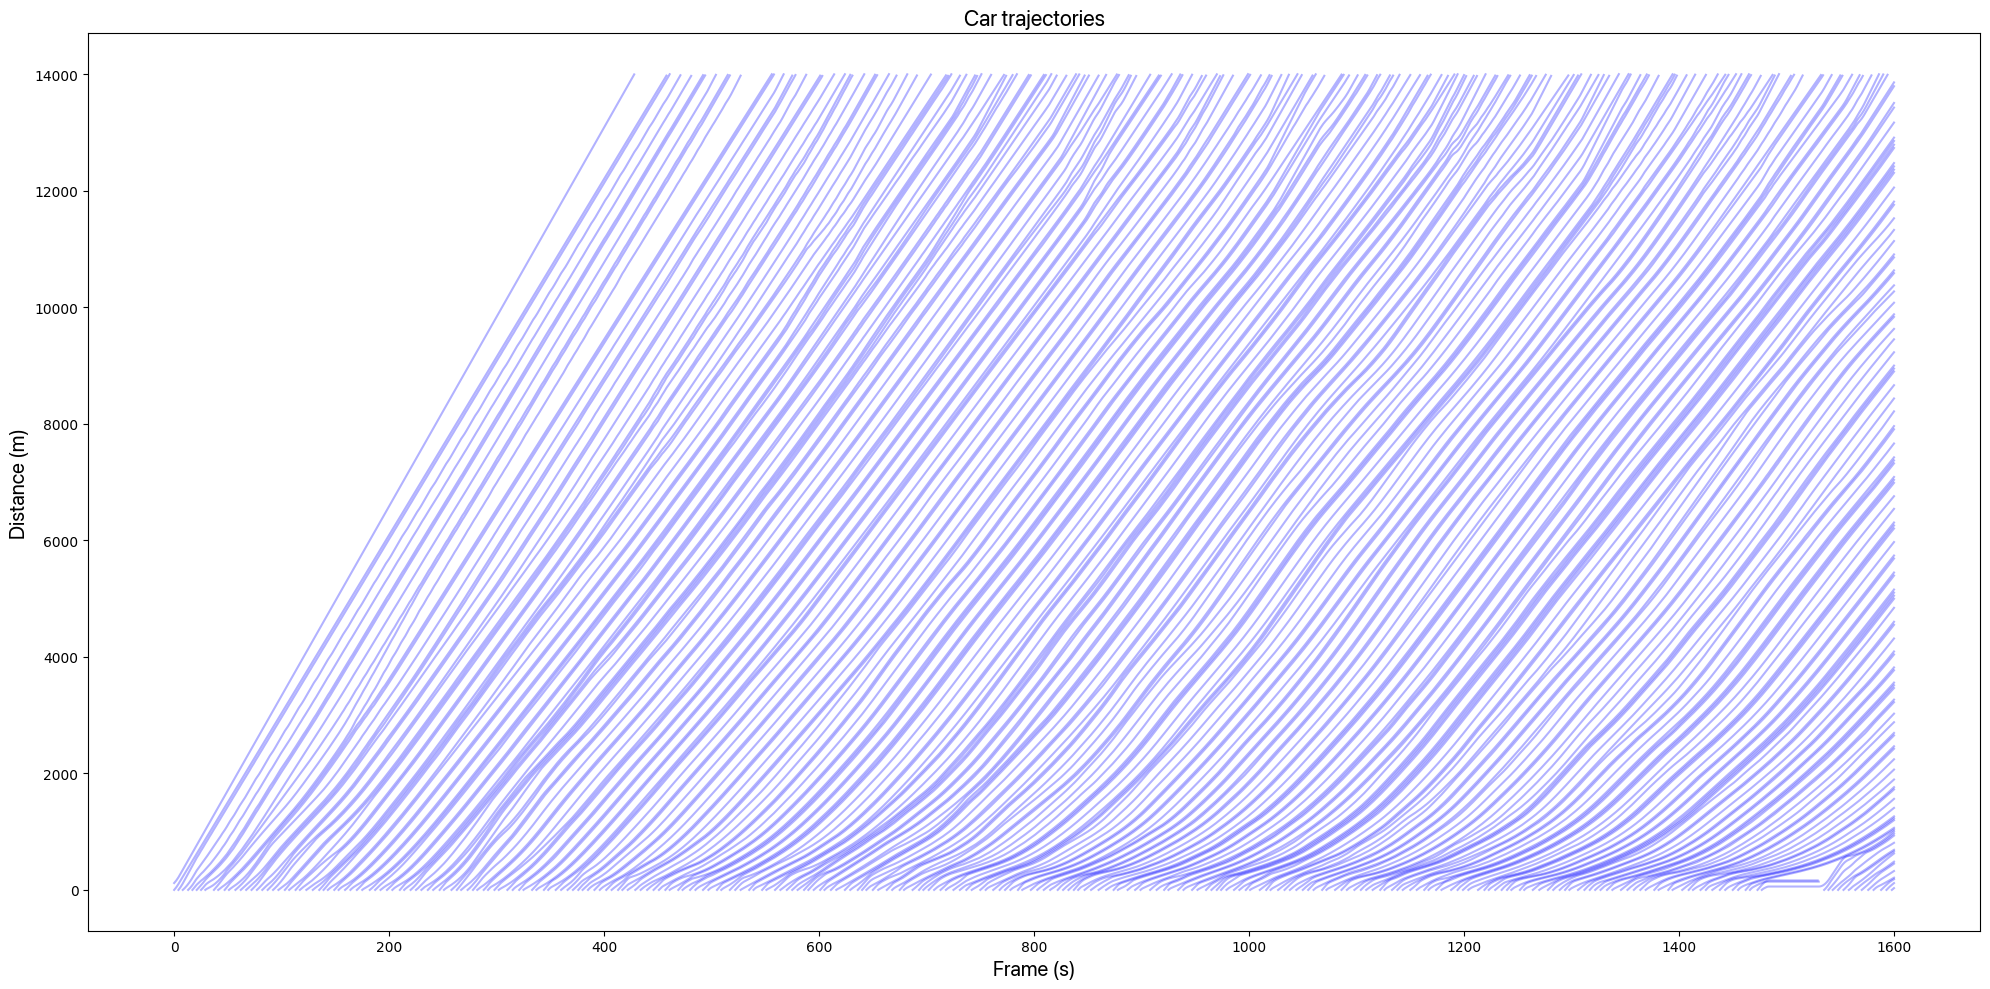

In [139]:
# Plot all car trajectories

fig, ax = plt.subplots(figsize=(20, 10))

#sns.scatterplot(data=cars_df, x='car_t_d', y='car_x', hue='car_id', ax=ax, s=10, color='blue')

cars_df.groupby('car_id').plot(x='frame', y='car_x', ax=ax, legend=False, alpha=0.3, color='blue')

ax.set_xlabel('Frame (s)', font="SF Pro Display", fontsize=15)
ax.set_ylabel('Distance (m)', font="SF Pro Display", fontsize=15)

ax.set_title(f'Car trajectories', font="SF Pro Display", fontsize=16)

fig.tight_layout()

# Transparent background
fig.patch.set_alpha(0)

fig.savefig('plots/car_trajectories_absolute.png', dpi=300, transparent=True)

In [136]:
exits_df.head()

,frame,car_id,avg_v,avg_a,t_d
